In [64]:
#import the required libraries
import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
# Import label encoder
from sklearn import preprocessing
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the data file

In [2]:
path = "customer_churn_large_dataset.xlsx"
Main_dataset = pd.read_excel(path)


In [144]:
## print shape of dataset with rows and columns
print(Main_dataset.shape)

(100000, 9)


In [145]:
Main_dataset.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [146]:
Main_dataset.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [147]:
Main_dataset.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#### Here we can see that 75% people who are not likely to churn are :
- People who are younger than age 57
- Use lesser than 387 GB 
- Has subscription for less than 19 months 
- Monthly bill less than 82.64 units

#### The remaining 25% people who are most likely to churn are :
- People who are older than age 57
- Use more than 387 GB 
- Has subscription for more than 19 months 
- Monthly bill more than 82.64 units

In [148]:
Main_dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


#### the columns are in desired data types

### Checking the distribution of the target variable

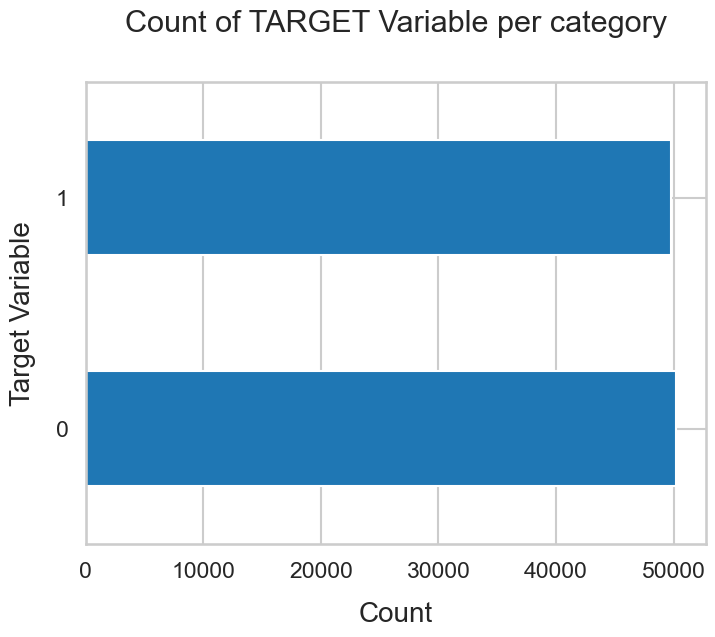

In [149]:
Main_dataset['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [150]:
100*Main_dataset['Churn'].value_counts()/len(Main_dataset['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [151]:
Main_dataset['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

#### Here we can conclude that our data is balanced

# EDA

### Data Cleaning
#### Checking for missing data

In [152]:
Main_dataset.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

#### Here we can see that we don't have any missing values in this data

#### I am dropping CustomerID and Name features

In [153]:
dataset = Main_dataset.drop(['CustomerID','Name'],axis=1)

In [154]:
# list of categoriacal variables
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes == 'O' and  len(Main_dataset[feature].unique())<25]

print("Categoriacal Variables Count: {}".format(len(categorical_features)))
categorical_features

Categoriacal Variables Count: 2


['Gender', 'Location']

#### 1. Plot distibution of individual predictors by churn

### Univariate Analysis

<Figure size 640x480 with 0 Axes>

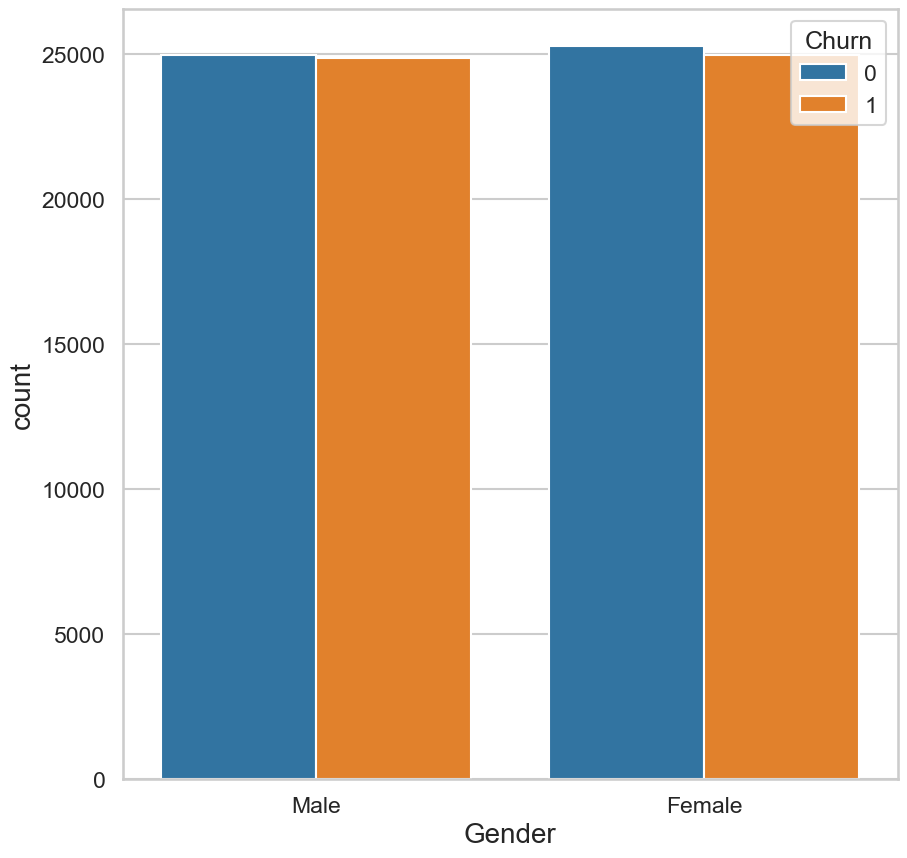

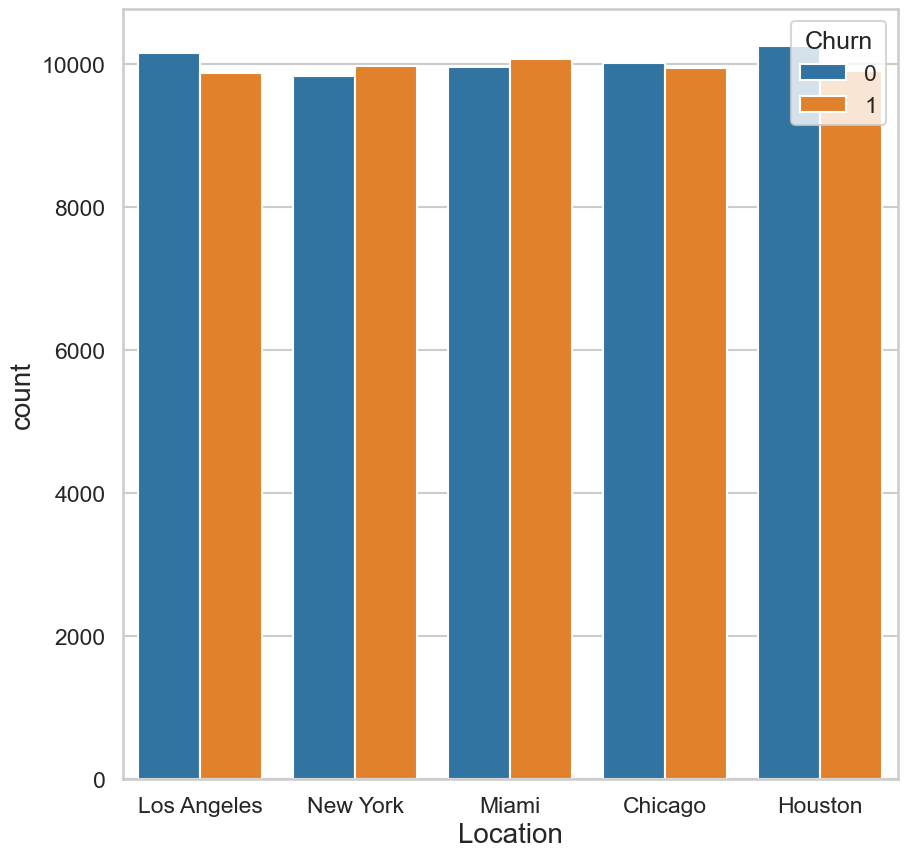

In [155]:
for i, predictor in enumerate(dataset[categorical_features]):
    plt.figure(i)
    plt.figure(figsize=(10,10 ))
    sns.countplot(data=dataset, x=predictor, hue ='Churn')

#### Here we can see that the categorical variables are evenly distributed

In [156]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  5


['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [157]:
dataset[numerical_features].head()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,17,73.36,236,0
1,62,1,48.76,172,0
2,24,5,85.47,460,0
3,36,3,97.94,297,1
4,46,19,58.14,266,0


In [158]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<20 and feature != 'Churn']
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [159]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

continuous_feature=[feature for feature in numerical_features if len(dataset[feature].unique())>20 and feature != 'Churn']
print("Continous Variables Count: {}".format(len(continuous_feature)))
continuous_feature

Continous Variables Count: 4


['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

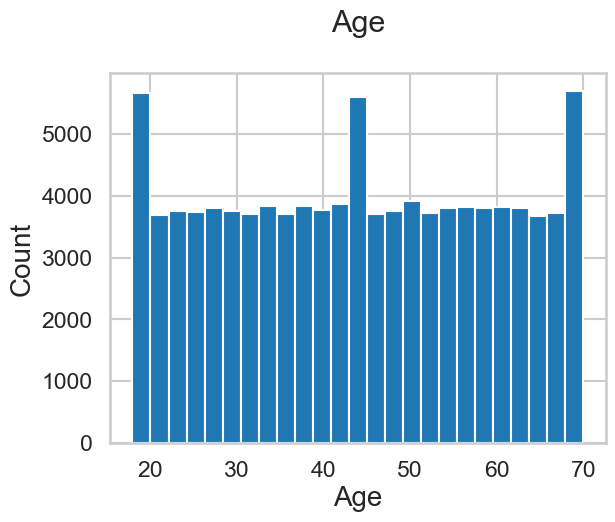

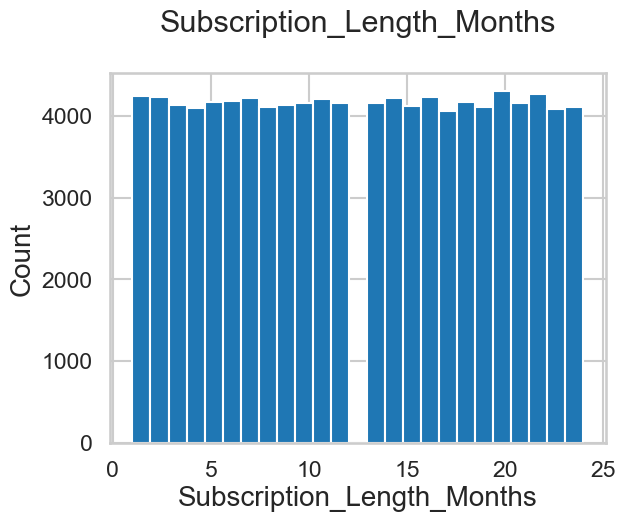

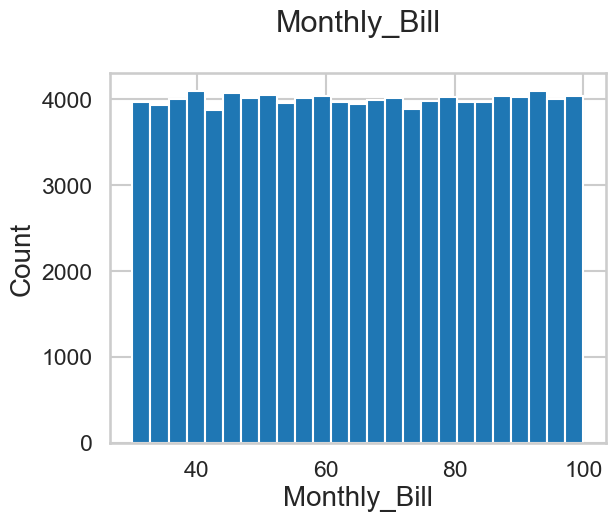

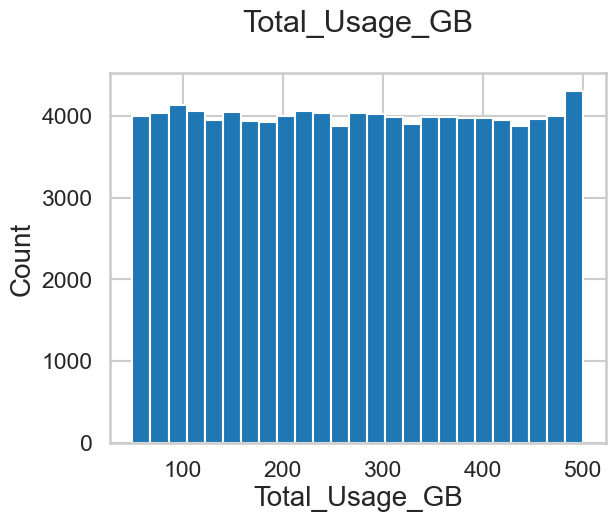

In [160]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Now we are encoding the categorical data

### Here I am directly implementing and creating a preprocessing pipeline, as I would need it to use during deployment

In [164]:
dataset

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [186]:
data = dataset.copy()

In [191]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [197]:
label_encoder = preprocessing.LabelEncoder()

# Create a pipeline
preprocessing_pipeline = Pipeline([
    ('label_encoder', label_encoder),  # Encode labels
])


# Fit and transform the dataset using the pipeline
ab= preprocessing_pipeline.fit_transform(data)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [198]:
data[:, :-1]

InvalidIndexError: (slice(None, None, None), slice(None, -1, None))

In [193]:
preprocessing_pipeline

Pipeline(steps=[('label_encoder', LabelEncoder())])

In [189]:
preprocessed_data

,Gender,Location,Churn
0,1,1,0
1,0,4,0
2,0,1,0
3,0,3,1
4,0,3,0
...,...,...,...
99995,1,0,1
99996,0,4,0
99997,1,2,1
99998,0,4,1


In [103]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,0,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


#### Build a corelation of all predictors with 'Churn'

<AxesSubplot:>

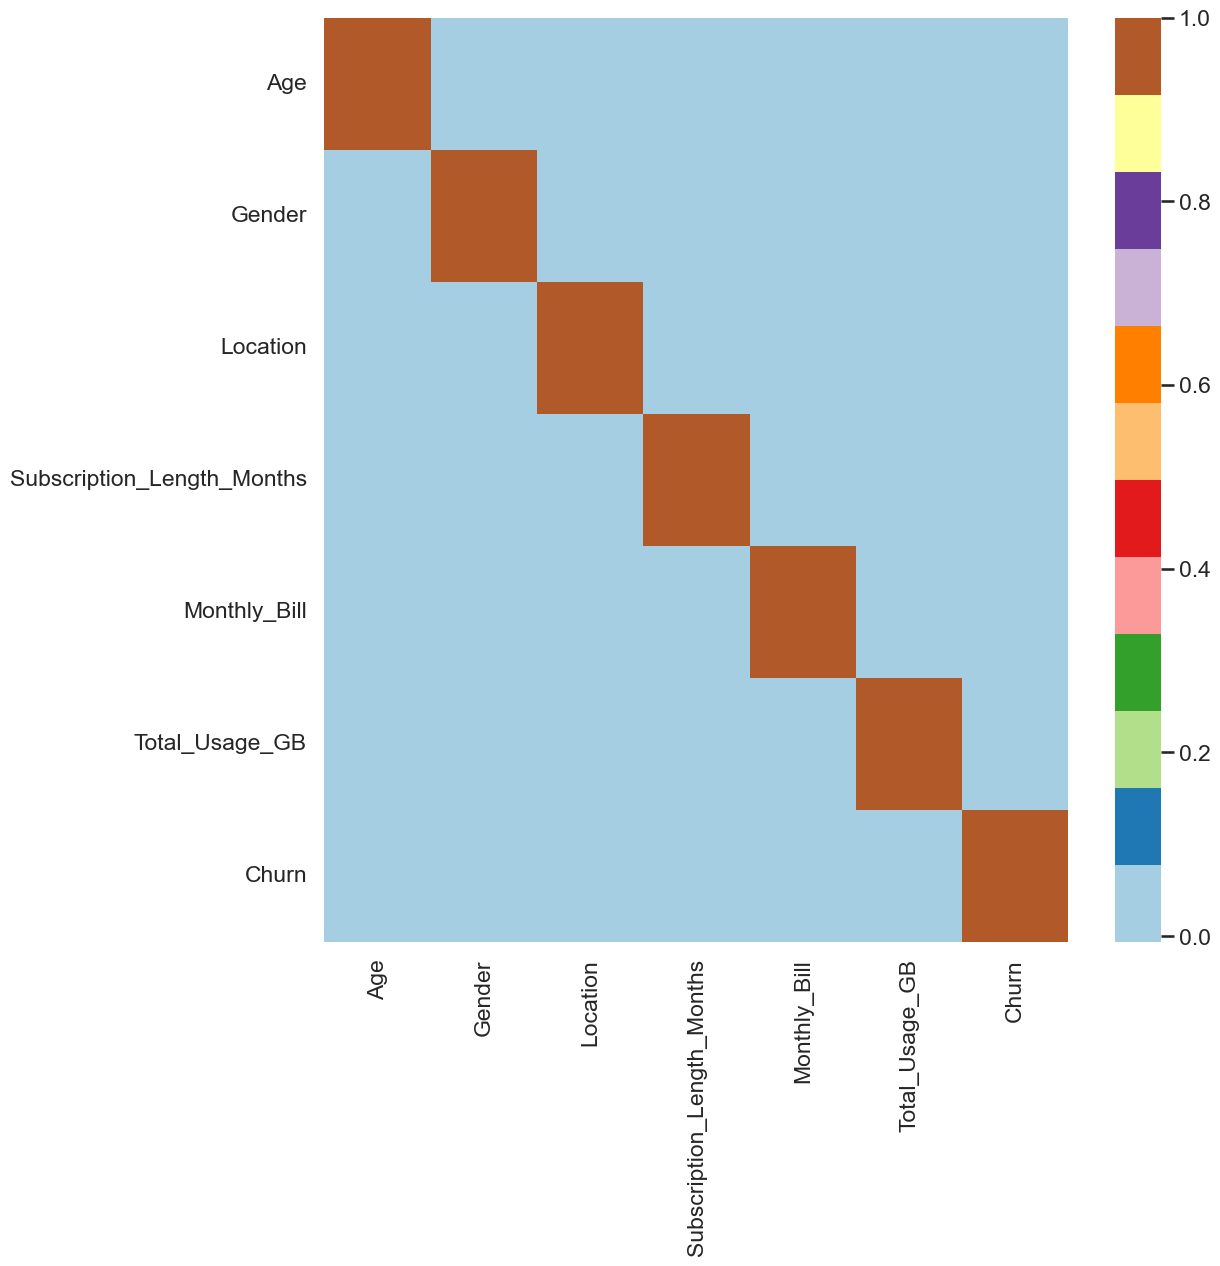

In [104]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap="Paired")

#### Here we don't see any special correlation among the parameters

### Bivariate Analysis


In [105]:
new_df1_target0=dataset.loc[dataset["Churn"]==0]
new_df1_target1=dataset.loc[dataset["Churn"]==1]

In [106]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

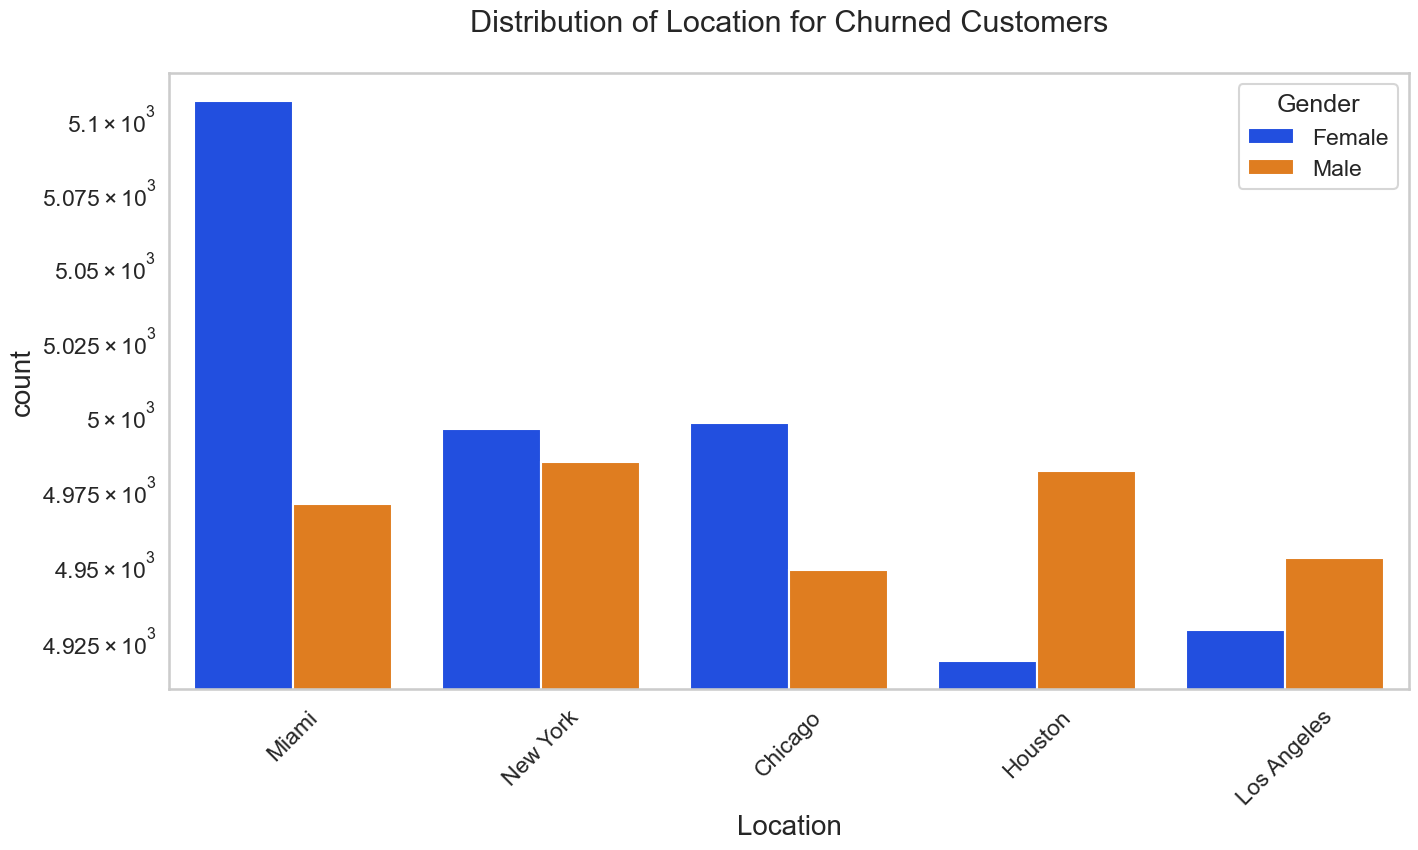

In [107]:
uniplot(new_df1_target1,col='Location',title='Distribution of Location for Churned Customers',hue='Gender')

#### Here we can see that the Female cutomers from Miami has got churned the most

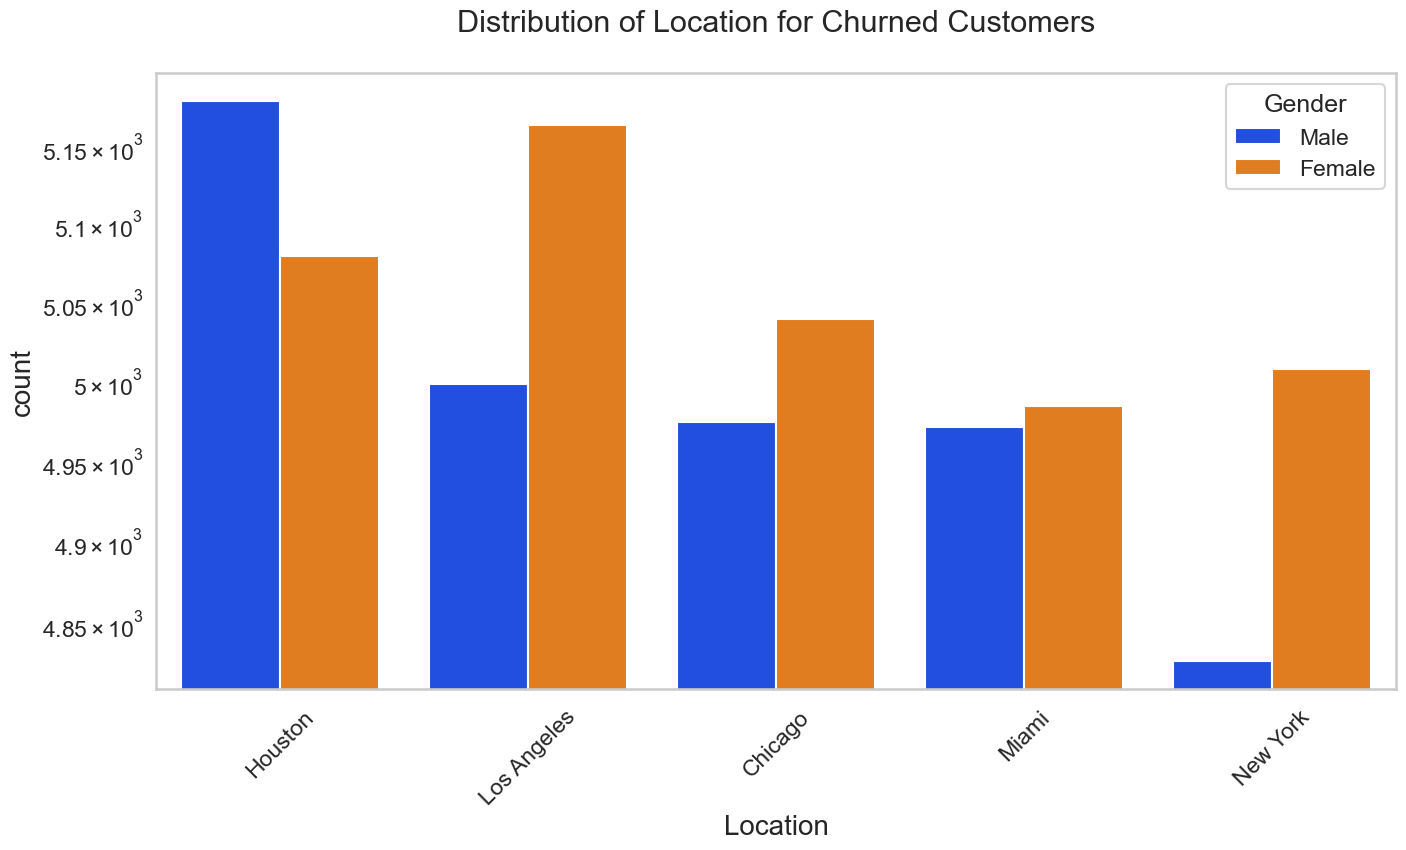

In [108]:
uniplot(new_df1_target0,col='Location',title='Distribution of Location for Churned Customers',hue='Gender')

#### Here we can see that the Female cutomers from Los Angeles and Male customers from Houston has got churned the least

# Train Test Split

In [109]:
from sklearn.model_selection import train_test_split


In [110]:
features = [feature for feature in data if feature != 'Churn' ]

In [111]:
x= data[features]
y = data["Churn"]

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(67000, 6)
(67000,)
(33000, 6)
(33000,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Feature Selection

In [113]:
# Define feature selection
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=3)

In [114]:
# Apply feature selection
fs.fit(x_train, y_train)

SelectKBest(k=3)

In [115]:
# True = Top 5 columns as we mentioned k = 3
# False = Allthe remaining columns excpet k = 3
fs.get_support()

array([ True, False,  True, False,  True, False])

In [116]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(fs.get_support())]
selected_feat

Index(['Age', 'Location', 'Monthly_Bill'], dtype='object')

In [117]:
import math
def list_ceil(x):
    return[math.ceil(i) for i in x]
print("P_Values :")
print(np.round(fs.pvalues_,4))
print("F Values :")
print(fs.scores_)


P_Values :
[0.1944 0.7897 0.0461 0.7265 0.392  0.589 ]
F Values :
[1.68397026 0.07114018 3.97877721 0.12234231 0.73263151 0.2918399 ]


In [118]:
list_ceil(fs.scores_)

[2, 1, 4, 1, 1, 1]

In [119]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(x_train.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(3,columns="Score"))

  Input_Features     Score  P_Value
2       Location  3.978777   0.0461
0            Age  1.683970   0.1944
4   Monthly_Bill  0.732632   0.3920


In [120]:
# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 6
selected features: 3


In [121]:
data.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [122]:
selected_feat

Index(['Age', 'Location', 'Monthly_Bill'], dtype='object')

In [123]:
x_train = x_train[selected_feat]
x_test = x_test[selected_feat]

In [124]:
x_train.head()


,Age,Location,Monthly_Bill
59428,45,1,31.67
34957,68,2,63.26
4264,28,0,53.31
53791,58,3,91.08
82114,56,2,53.19


In [125]:
y_train.head()


59428    1
34957    0
4264     1
53791    1
82114    1
Name: Churn, dtype: int64

## Trying out various classifiers on the cleaned dataset

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt



from sklearn.metrics import mean_absolute_error,r2_score,classification_report,confusion_matrix


def train_model(m,name):
    model = m
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(f"\n{name}")
    print(classification_report(y_test, predictions))



train_model(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model(RandomForestClassifier(random_state=3),"Random Forest Classifier")   
train_model(XGBClassifier(n_estimators=600),"XGBoost Classifier")   
train_model(GradientBoostingClassifier(random_state=1),"Gradient Classifier")   
train_model(ExtraTreesClassifier(),"Extra Trees Classifier")   
train_model(LogisticRegression(),"Logistic Regression")



Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     16638
           1       0.50      0.50      0.50     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16638
           1       0.50      0.50      0.50     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16638
           1       0.49      0.49      0.49     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
we

#### Here we can see that all the classifier is giving 50%, so we would try to find better way for model building

### Using SMOTEENN 

In [127]:
from imblearn.combine import SMOTEENN


In [128]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_train,y_train)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [129]:
def train_model_Smoteenn(m,name):
    xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
    model_dt_smote = m
    model_dt_smote.fit(xr_train,yr_train)
    yr_predict = model_dt_smote.predict(xr_test)
    model_score_r = model_dt_smote.score(xr_test, yr_test)
    print(name)
    print(classification_report(yr_test, yr_predict))

In [130]:
train_model_Smoteenn(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model_Smoteenn(RandomForestClassifier(random_state=3),"Random Forest Classifier")   
train_model_Smoteenn(XGBClassifier(n_estimators=600),"XGBoost Classifier")   
train_model_Smoteenn(GradientBoostingClassifier(random_state=1),"Gradient Classifier")   
train_model_Smoteenn(ExtraTreesClassifier(),"Extra Trees Classifier")   
train_model_Smoteenn(LogisticRegression(),"Logistic Regression")

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       872
           1       0.79      0.83      0.81       838

    accuracy                           0.81      1710
   macro avg       0.81      0.81      0.81      1710
weighted avg       0.81      0.81      0.81      1710

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       857
           1       0.92      0.90      0.91       853

    accuracy                           0.91      1710
   macro avg       0.91      0.91      0.91      1710
weighted avg       0.91      0.91      0.91      1710

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       851
           1       0.81      0.80      0.80       859

    accuracy                           0.80      1710
   macro avg       0.80      0.80      0.80      1710
weigh

#### By using SMOTEENN we are getting much better result, Extra Trees Classifier has provided 91% accuracy with SMOTEENN so I am chosing it as the final model

In [131]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote = ExtraTreesClassifier()
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print('Extra Trees Classifier')
print(classification_report(yr_test, yr_predict))

Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       851
           1       0.92      0.91      0.92       859

    accuracy                           0.92      1710
   macro avg       0.92      0.92      0.92      1710
weighted avg       0.92      0.92      0.92      1710



In [132]:
print(confusion_matrix(yr_test, yr_predict))

[[787  64]
 [ 76 783]]


# Saving model as a pickle file

In [133]:
import pickle

filename = 'model.pkl'

pickle.dump(model_dt_smote, open(filename, 'wb'))

### The saved model is working Correctly

In [134]:
load_model = pickle.load(open(filename, 'rb'))

model_score_r = load_model.score(xr_test, yr_test)

print('Extra Trees Classifier')
print(classification_report(yr_test, yr_predict))

Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       851
           1       0.92      0.91      0.92       859

    accuracy                           0.92      1710
   macro avg       0.92      0.92      0.92      1710
weighted avg       0.92      0.92      0.92      1710



### Making a preprocessor pipeline

In [135]:
dataset[['Age','Location','Monthly_Bill','Churn']]

,Age,Location,Monthly_Bill,Churn
0,63,Los Angeles,73.36,0
1,62,New York,48.76,0
2,24,Los Angeles,85.47,0
3,36,Miami,97.94,1
4,46,Miami,58.14,0
...,...,...,...,...
99995,33,Houston,55.13,1
99996,62,New York,61.65,0
99997,64,Chicago,96.11,1
99998,51,New York,49.25,1


In [143]:
# Custom Transformer to preprocess categorical features

# Define categorical features
categorical_features = ['Location']

# Create a pipeline
pipeline = Pipeline([
    ('categorical_processor', CategoricalFeatureProcessor())
])



# Fit and transform the dataset using the pipeline
preprocessed_data = pipeline.fit_transform(dataset[['Age','Location','Monthly_Bill','Churn']])

KeyError: 'Column not found: Churn'

In [137]:
data[['Age','Location','Monthly_Bill','Churn']]


,Age,Location,Monthly_Bill,Churn
0,63,2,73.36,0
1,62,4,48.76,0
2,24,2,85.47,0
3,36,3,97.94,1
4,46,3,58.14,0
...,...,...,...,...
99995,33,1,55.13,1
99996,62,4,61.65,0
99997,64,0,96.11,1
99998,51,4,49.25,1


In [138]:
preprocessed_data

,Age,Location,Monthly_Bill,Churn
0,63,1,73.36,0
1,62,4,48.76,0
2,24,1,85.47,0
3,36,3,97.94,1
4,46,3,58.14,0
...,...,...,...,...
99995,33,0,55.13,1
99996,62,4,61.65,0
99997,64,2,96.11,1
99998,51,4,49.25,1


#### As we can see that the pipeline is working correctly, I am going to download it as a pkl file.
#### NOTE : I am using 'Churn' parameter in the pipeline just for encoding the categorical values in fitting, the value of Churn parameter won't affect the lable encoding process or other parameters

In [60]:
fea_df = pd.DataFrame([[45, 'Chicago', 31.67, 0]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = pipeline.transform(fea_df)

data_scaled[['Age', 'Location', 'Monthly_Bill']]

,Age,Location,Monthly_Bill
0,45,2,31.67


In [61]:
fea_df = pd.DataFrame([[45, 'Chicago', 31.67,1 ]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = pipeline.transform(fea_df)

data_scaled[['Age', 'Location', 'Monthly_Bill']]

,Age,Location,Monthly_Bill
0,45,2,31.67


#### Here we can see the value of parameter is not affecting the other parameters

# Saving the preprocessor

In [62]:
# Save the pipeline to a pickle file
with open('preprocessing_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

### The saved preprocessor is also working correctly

In [63]:
load_Preprocessor = pickle.load(open('preprocessing_pipeline.pkl', 'rb'))

fea_df = pd.DataFrame([[45, 'Chicago', 31.67, 0]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = load_Preprocessor.transform(fea_df)

data_scaled[['Age', 'Location', 'Monthly_Bill']]


,Age,Location,Monthly_Bill
0,45,2,31.67
